https://note.nkmk.me/python-pandas-time-series-multiindex/

https://note.nkmk.me/python-pandas-time-series-datetimeindex/

In [66]:
# import os
# os.listdir('../input')
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
path='../../input/'
ar = pd.read_csv(f'{path}air_reserve.csv',)
asi = pd.read_csv(f'{path}air_store_info.csv',)
avd = pd.read_csv(f'{path}air_visit_data.csv',)
di = pd.read_csv(f'{path}date_info.csv',)
hr = pd.read_csv(f'{path}hpg_reserve.csv',)
hsi = pd.read_csv(f'{path}hpg_store_info.csv',)
sa = pd.read_csv(f'{path}sample_submission.csv',)
sir = pd.read_csv(f'{path}store_id_relation.csv',)


In [139]:
print(asi.shape)
print(ar.shape)
print(avd.shape)
print(di.shape)
print(hsi.shape)
print(sa.shape)
print(sir.shape)

(829, 5)
(92378, 4)
(252108, 3)
(517, 3)
(4690, 5)
(32019, 2)
(150, 2)


In [141]:
# air_reserve.csvで予約から来訪までの差異を取得できるのでこれを取得して予測に使用する
# reserve_visitorsとtimedelta_Intを使用する

from datetime import timedelta 
len(hr.hpg_store_id.unique())
ar['visit_datetime'] = pd.to_datetime(ar['visit_datetime'])
ar['reserve_datetime'] = pd.to_datetime(ar['reserve_datetime'])
ar['timedelta'] = ar['visit_datetime'] - ar['reserve_datetime'] 
# ar.dtypes
ar["timedelta_Int"] = (ar["timedelta"] / timedelta(days=1))
ar.dtypes
ar
pd.merge(avd,ar,left_on="air_store_id",right_on="air_store_id").isnull().sum()
pd.merge(avd,ar,left_on="air_store_id",right_on="air_store_id")


air_store_id        0
visit_date          0
visitors            0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
timedelta           0
timedelta_Int       0
dtype: int64

In [101]:
asi.air_genre_name.unique()

array(['Italian/French', 'Dining bar', 'Yakiniku/Korean food',
       'Cafe/Sweets', 'Izakaya', 'Okonomiyaki/Monja/Teppanyaki',
       'Bar/Cocktail', 'Japanese food', 'Creative cuisine', 'Other',
       'Western food', 'International cuisine', 'Asian', 'Karaoke/Party'],
      dtype=object)

In [ ]:
# store_id_relationを使用してair_regiのデータとhotpepperのデータを結合する

In [98]:
data = pd.merge(hsi,sir,left_on="hpg_store_id",right_on="hpg_store_id")
data = pd.merge(data,avd,left_on="air_store_id",right_on="air_store_id")
data
hsi


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
...,...,...,...,...,...
4685,hpg_c6ed353a48c7c93e,Sichuan food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4686,hpg_a58d2423360b2fb4,Sichuan food,Tōkyō-to Minato-ku Roppongi,35.666137,139.733978
4687,hpg_d2021704076cdd70,Shanghai food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4688,hpg_602472570d65e219,Spain/Mediterranean cuisine,Tōkyō-to Toshima-ku None,35.730068,139.711742


In [99]:
# hsi['store_id'] = hsi['hpg_store_id'].str.slice(4,)
# avd['store_id'] = avd['air_store_id'].str.slice(4,)
data = pd.merge(hsi,avd,left_on="store_id",right_on="store_id")
# pandas.merge(left, right, how='inner', on=None,)
data
pd.merge(hsi,avd,left_on="store_id",right_on="store_id")
# hsi
avd
# 積集合
a = set(hsi.store_id.sort_values().values)
b = set(avd.store_id.sort_values().values)
s_intersection = a.intersection(b)
print(s_intersection)

KeyError: 'store_id'

In [55]:
hsi.hpg_genre_name.unique()
# air_store_infoよりhpg_store_infoの方がレストランの詳細な情報を持っている!
# hpg_genre_name > air_genre_name

array(['Japanese style', 'Italian', 'International cuisine',
       'Grilled meat', 'Creation', 'Shabu-shabu/Sukiyaki',
       'Korean cuisine', 'Creative Japanese food',
       'Japanese cuisine/Kaiseki', 'Seafood', 'Japanese food in general',
       'Party', 'Okonomiyaki/Monja/Teppanyaki', 'Sushi',
       'Spain Bar/Italian Bar', 'Chinese general', 'Bistro', 'French',
       'Karaoke', 'Pasta/Pizza', 'Cafe', 'Sweets',
       'Steak/Hamburger/Curry', 'Thai/Vietnamese food', 'Western food',
       'Taiwanese/Hong Kong cuisine', 'Cantonese food', 'Bar/Cocktail',
       'Dim Sum/Dumplings', 'Amusement bar', 'Sichuan food',
       'Shanghai food', 'Spain/Mediterranean cuisine', 'Udon/Soba'],
      dtype=object)

In [54]:
avd['air_store_id2'] = avd['air_store_id'].str.slice(4,)
avd.min(),avd.max()

(air_store_id     air_00a91d42b08b08d9
 visit_date                 2016-01-01
 visitors                            1
 air_store_id2        00a91d42b08b08d9
 dtype: object,
 air_store_id     air_fff68b929994bfbd
 visit_date                 2017-04-22
 visitors                          877
 air_store_id2        fff68b929994bfbd
 dtype: object)

In [4]:
a = pd.read_csv(f'{path}air_reserve.csv',)

In [5]:
a.dtypes

air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [6]:
a.reserve_visitors = a.reserve_visitors.astype('float64')
a['date'] = pd.to_datetime(a.reserve_datetime)
a.set_index("date",inplace=True)

In [7]:
print(type(a.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [8]:
a = a.sort_index()
a

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
date,,,,
2016-01-01 01:00:00,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5.0
2016-01-01 02:00:00,air_f690c42545146e0a,2016-01-05 20:00:00,2016-01-01 02:00:00,2.0
2016-01-01 12:00:00,air_6b15edd1b4fbb96a,2016-01-02 17:00:00,2016-01-01 12:00:00,3.0
2016-01-01 12:00:00,air_6b15edd1b4fbb96a,2016-01-02 18:00:00,2016-01-01 12:00:00,3.0
2016-01-01 14:00:00,air_ee3a01f0c71a769f,2016-01-09 13:00:00,2016-01-01 14:00:00,2.0
...,...,...,...,...
2017-04-22 23:00:00,air_2fc478dc9f0a6b31,2017-04-30 19:00:00,2017-04-22 23:00:00,2.0
2017-04-22 23:00:00,air_c47aa7493b15f297,2017-04-23 20:00:00,2017-04-22 23:00:00,2.0
2017-04-22 23:00:00,air_96743eee94114261,2017-04-28 18:00:00,2017-04-22 23:00:00,2.0


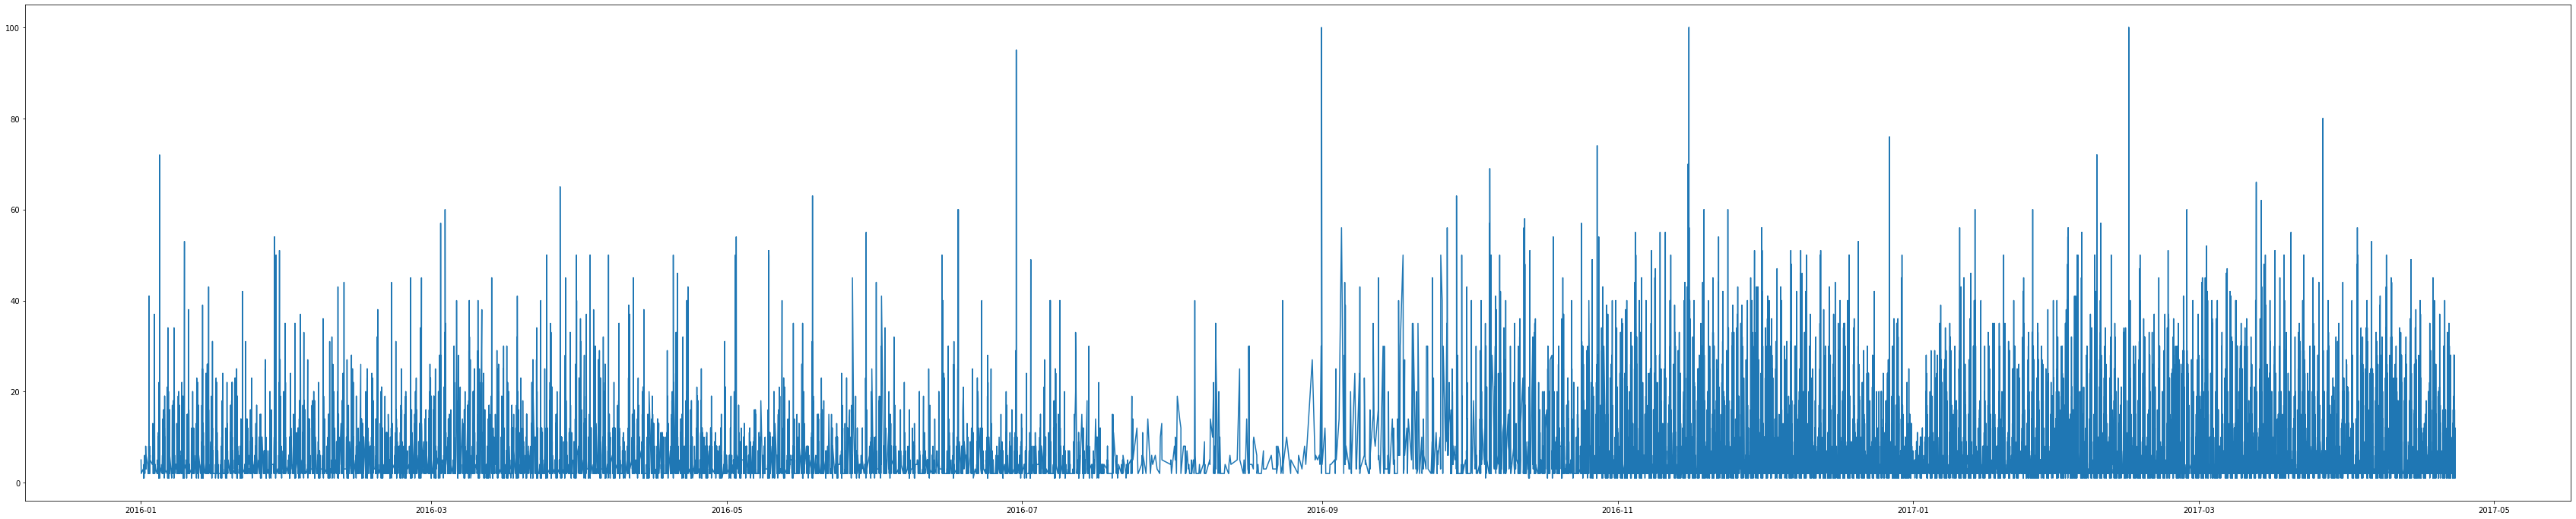

In [9]:
plt.figure(figsize=(60,12))
plt.plot(a.reserve_visitors)
plt.show()

# 見れないので月単位くらいで集計したい

In [10]:
print(a.resample('W').sum())
print(a.resample('M').sum())
print(a.resample('Q').sum())
print(a.resample('Y').sum())


            reserve_visitors
date                        
2016-01-03             372.0
2016-01-10            3769.0
2016-01-17            3316.0
2016-01-24            2763.0
2016-01-31            3239.0
...                      ...
2017-03-26           11648.0
2017-04-02           10594.0
2017-04-09           13199.0
2017-04-16           12113.0
2017-04-23           11027.0

[69 rows x 1 columns]
            reserve_visitors
date                        
2016-01-31           13459.0
2016-02-29           12991.0
2016-03-31           17210.0
2016-04-30           13473.0
2016-05-31            8582.0
2016-06-30            6010.0
2016-07-31            3779.0
2016-08-31            1077.0
2016-09-30            2412.0
2016-10-31           20122.0
2016-11-30           60408.0
2016-12-31           59680.0
2017-01-31           48934.0
2017-02-28           48797.0
2017-03-31           58564.0
2017-04-30           38517.0
            reserve_visitors
date                        
2016-03-31          

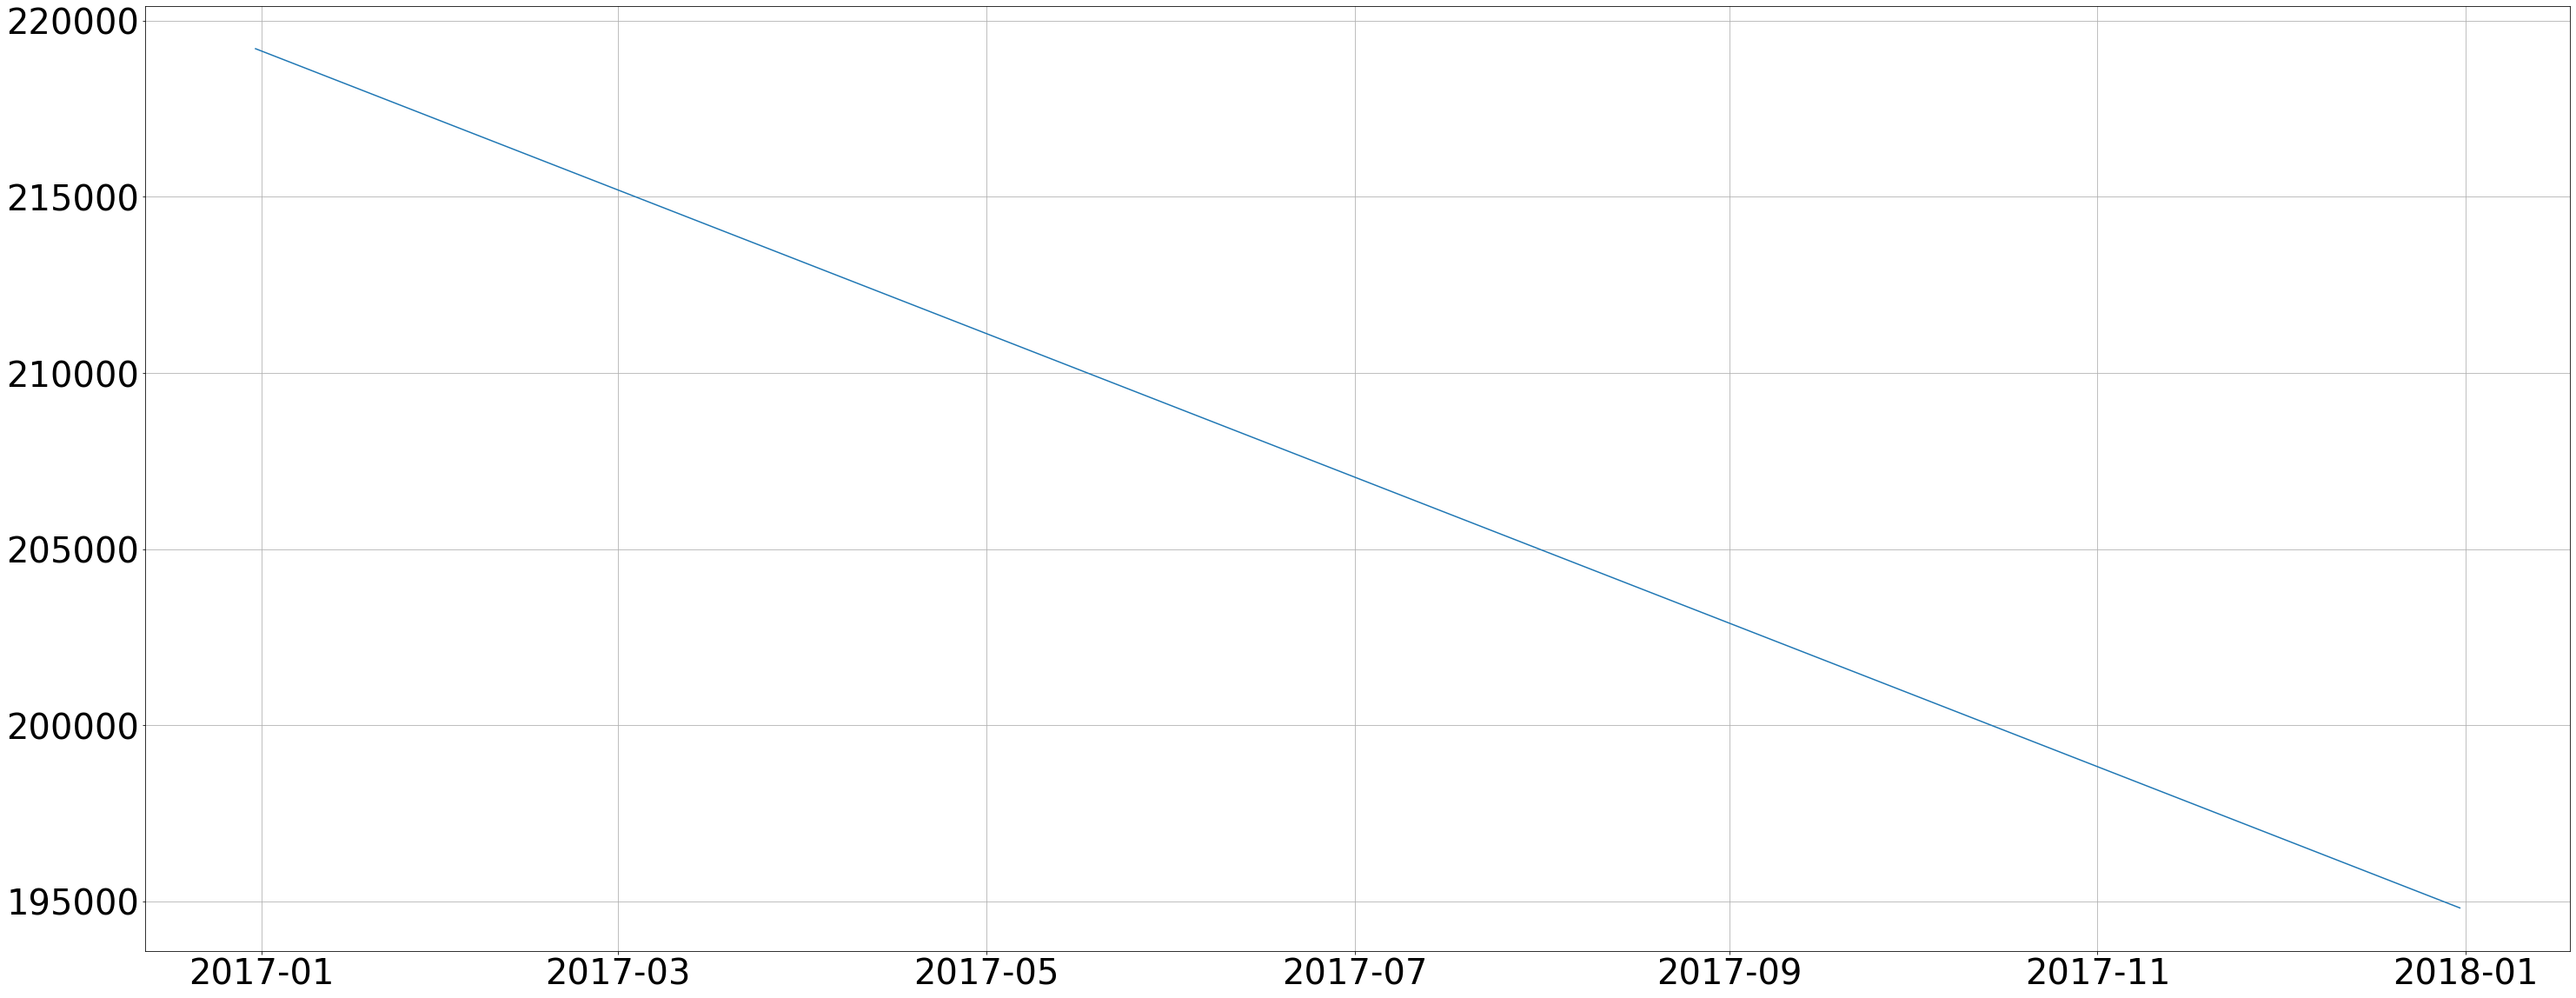

In [11]:
plt.figure(figsize=(50,20))
plt.rcParams["font.size"] = 40
plt.grid()
y = a.resample('Y').sum()
plt.plot(y.index,y)

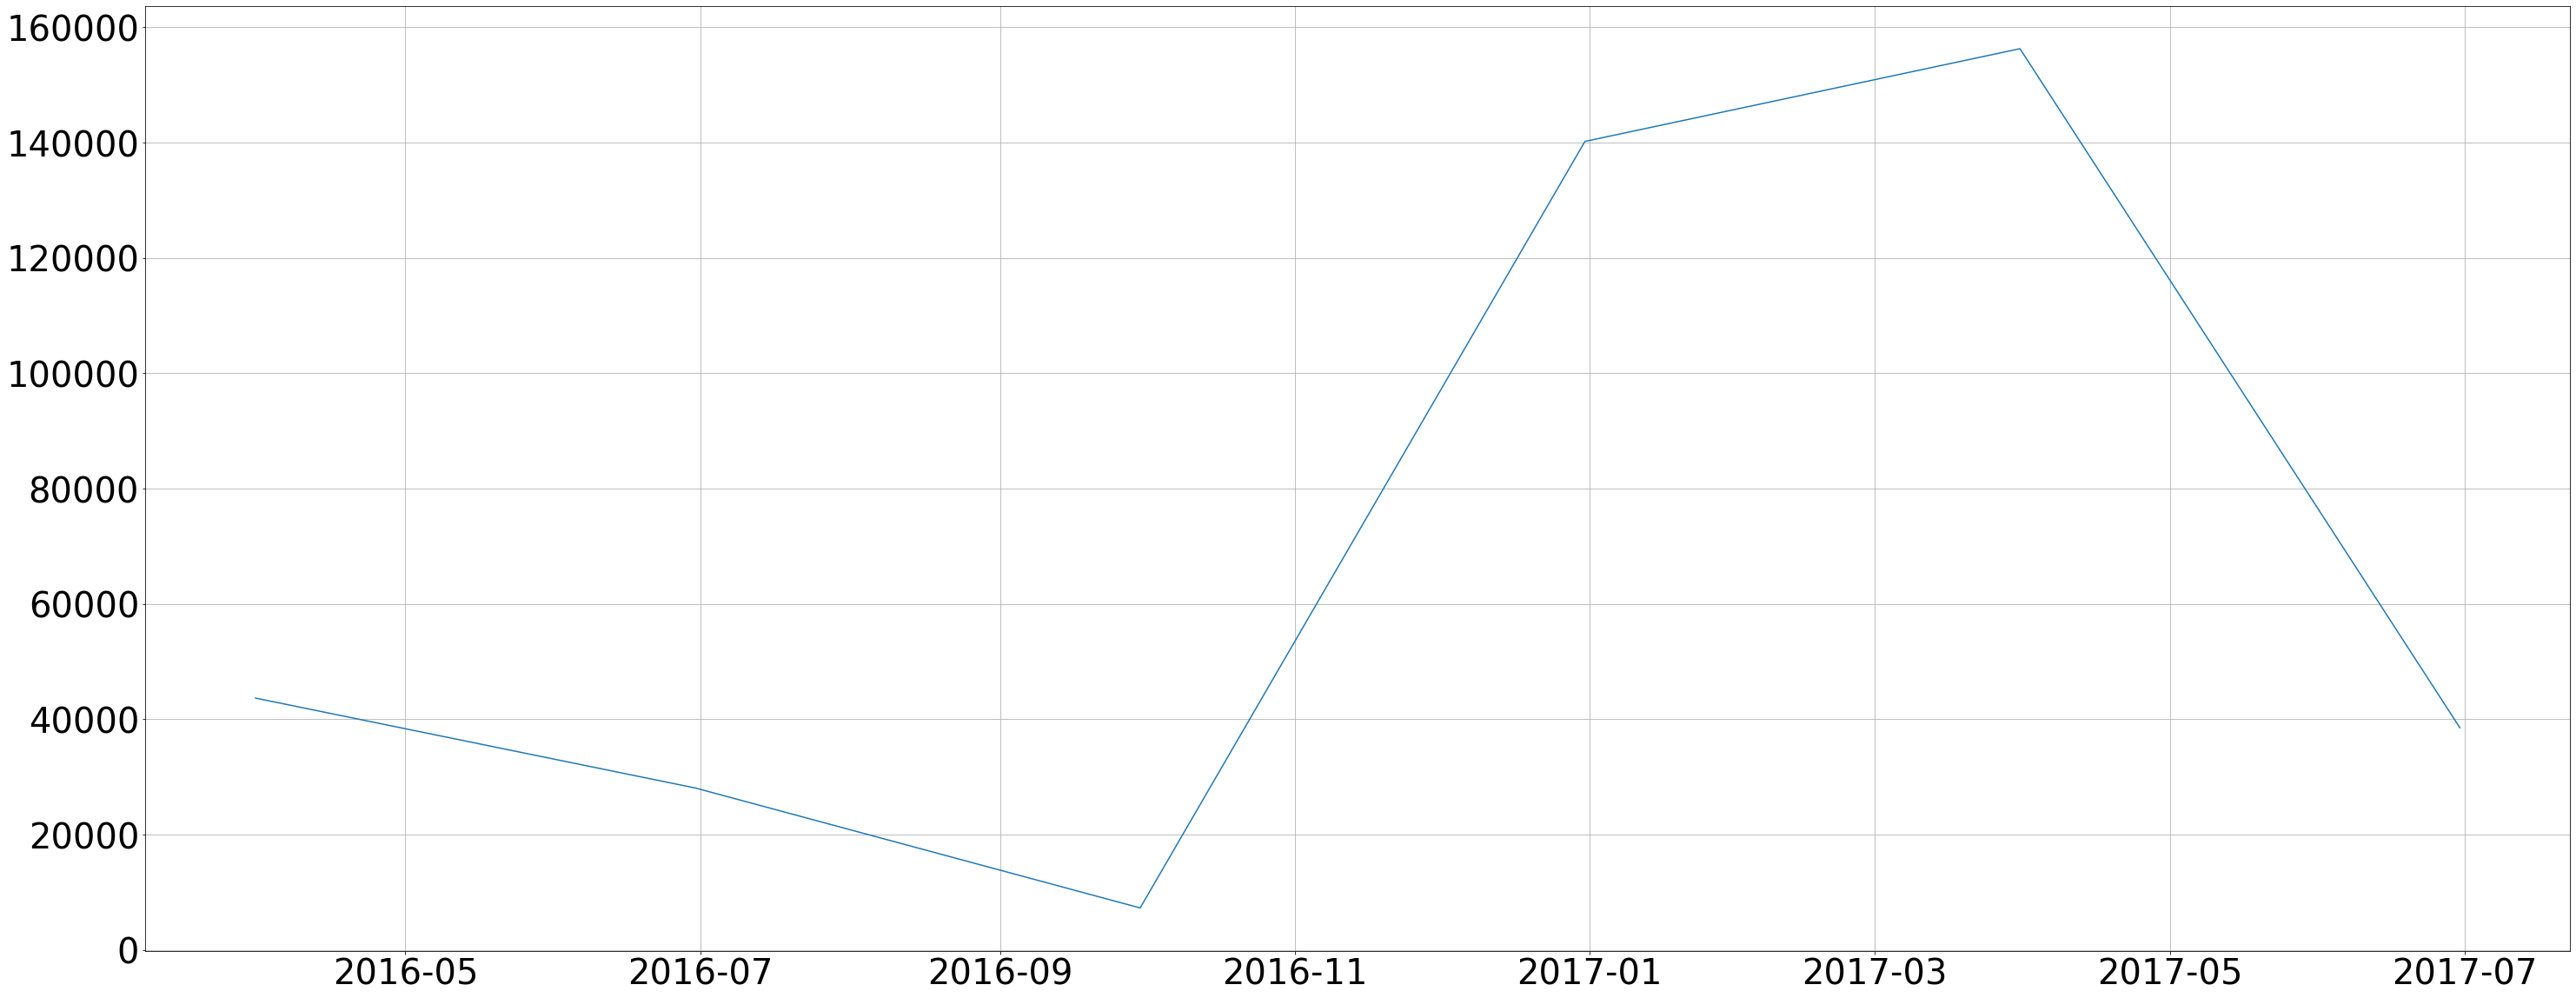

In [12]:
plt.figure(figsize=(50,20))
plt.rcParams["font.size"] = 40
plt.grid()
q = a.resample('Q').sum()
plt.plot(q.index,q)

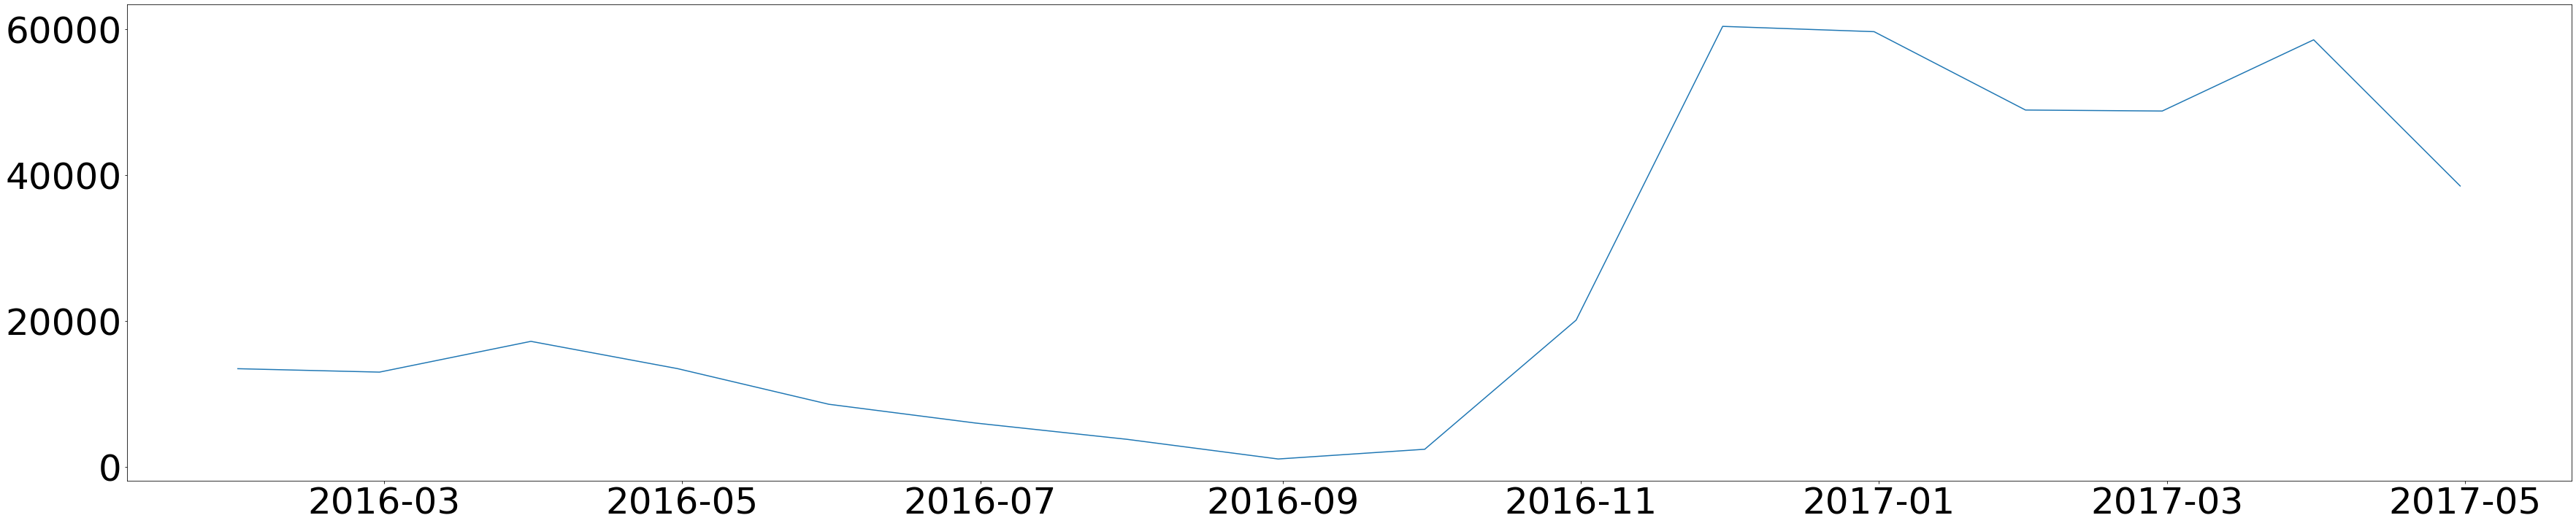

In [13]:
plt.figure(figsize=(60,12))
plt.rcParams["font.size"] = 50
m = a.resample('M').sum()
plt.plot(m.index,m)

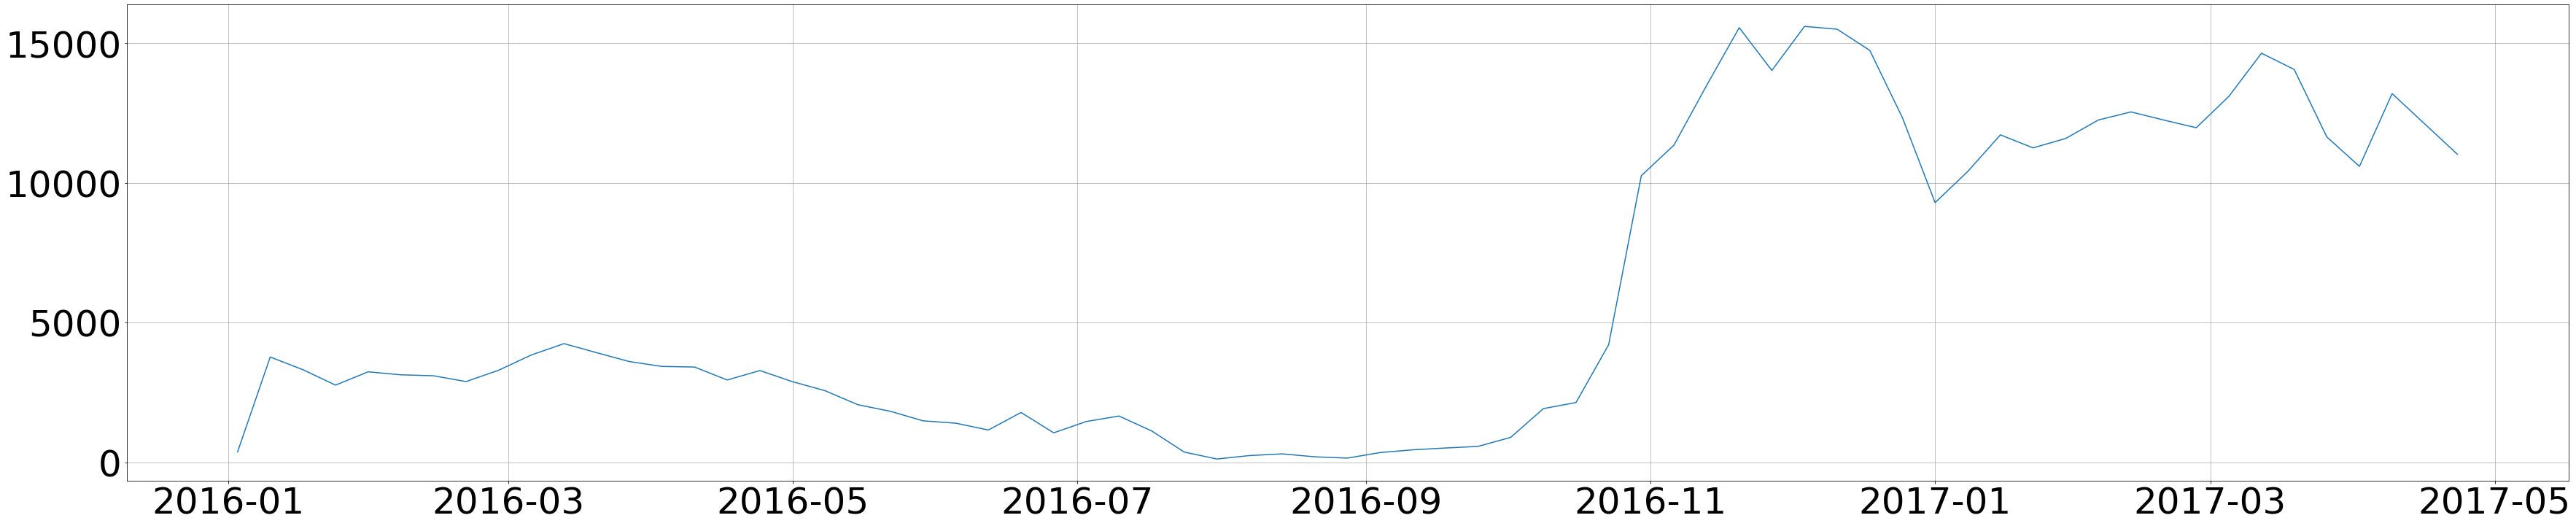

In [14]:
plt.figure(figsize=(60,12))
plt.rcParams["font.size"] = 50
w = a.resample('W').sum()
plt.grid()
plt.plot(w.index,w)

In [16]:
d

,reserve_visitors
date,
2016-01-01,60.0
2016-01-02,197.0
2016-01-03,115.0
2016-01-04,418.0
2016-01-05,451.0
...,...
2017-04-18,2253.0
2017-04-19,1943.0
2017-04-20,1964.0


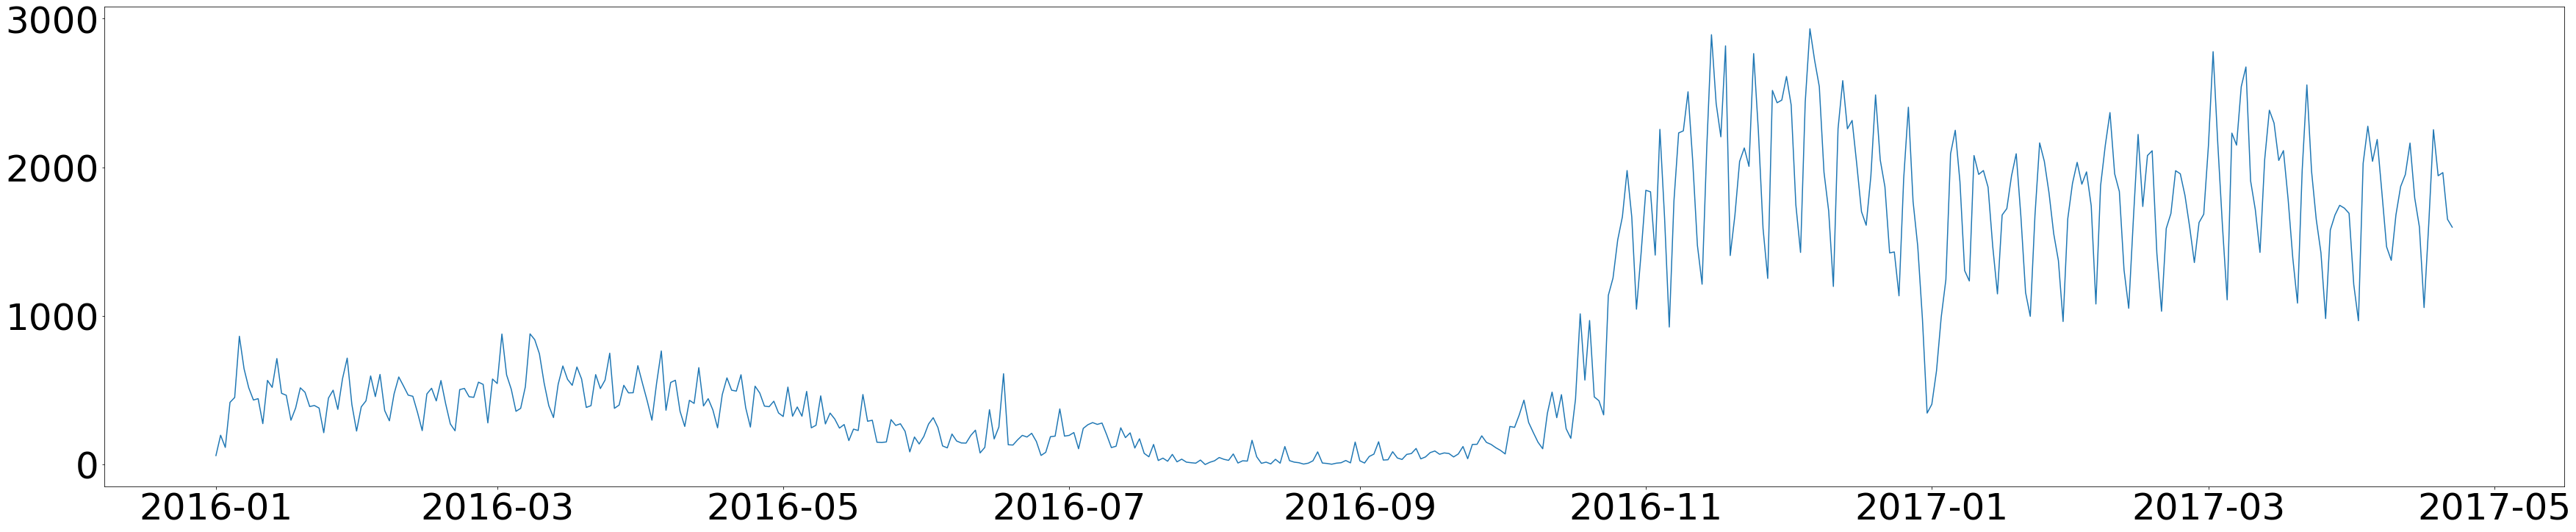

In [15]:
plt.figure(figsize=(60,12))
plt.rcParams["font.size"] = 50
d = a.resample('D').sum()
plt.plot(d.index,d)
# 周期性がある。明らかに2016年11月から来訪者の数が増加していて、その分振れ幅も大きくなっている。
# 考えられるのは、
# - paypayのように大規模キャンペーンを打った
# - 一気に力を入れて法人営業した　等

In [266]:
a.columns

Index(['air_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

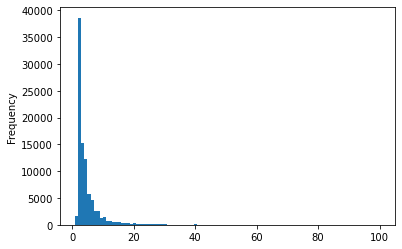

In [267]:
plt.rcParams["font.size"] = 10
a.reserve_visitors.plot.hist(bins=100)
# 対数変換したほうがよさげな気がする

In [268]:
# DatetimeIndexの属性weekdayまたはdayofweekで、月曜日が0、日曜日が6となる整数で曜日の情報を取得できる。
# どちらでも同じ。

print(a.index.weekday)
# Int64Index([2, 1, 5, 0, 1, 1, 4, 4, 2, 0, 4, 1], dtype='int64', name='date')

# print(df.index.dayofweek)
# Int64Index([2, 1, 5, 0, 1, 1, 4, 4, 2, 0, 4, 1], dtype='int64', name='date')

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
           dtype='int64', name='date', length=92378)


In [269]:
print(a.index.day_name())

Index(['Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday',
       ...
       'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday'],
      dtype='object', name='date', length=92378)


In [270]:
# 曜日を指定して行を抽出
# 例えば、月曜日（0）の行を抽出したい場合は、以下のようにする。

# print(a[a.index.weekday == 0])

# print(df[df.index.weekday == 0].sum())
# print(df[df.index.weekday == 0].mean())
display(a[a.index.weekday == 0].agg(['sum', 'mean']))

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
sum,air_24b9b2a020826edeair_f911308e19d64236air_78...,2016-01-12 17:00:002016-01-07 20:00:002016-01-...,2016-01-04 01:00:002016-01-04 08:00:002016-01-...,57381.000000
mean,NaN,NaN,NaN,4.759144


In [271]:
aa = a.set_index([a.index.weekday, a.index])
# aa[50:90]
# このままだとインデックス列の名前が重複しているので、index.names属性を書き換える。
aa.index.names = ['weekday', 'date']
aa.sort_index(inplace=True)
aa[50:90]

air_store_id       visit_datetime  \
weekday date                                                             
0       2016-01-04 19:00:00  air_3c05c8f26c611eb9  2016-01-12 18:00:00   
        2016-01-04 19:00:00  air_32460819c7600037  2016-01-08 18:00:00   
        2016-01-04 19:00:00  air_db80363d35f10926  2016-01-08 21:00:00   
        2016-01-04 20:00:00  air_877f79706adbfb06  2016-01-08 21:00:00   
        2016-01-04 20:00:00  air_6d65542aa43b598b  2016-01-12 12:00:00   
        2016-01-04 20:00:00  air_de692863bb2dd758  2016-01-05 18:00:00   
        2016-01-04 20:00:00  air_db80363d35f10926  2016-01-22 18:00:00   
        2016-01-04 20:00:00  air_54ed43163b7596c4  2016-01-13 18:00:00   
        2016-01-04 20:00:00  air_24b9b2a020826ede  2016-01-23 16:00:00   
        2016-01-04 21:00:00  air_a17f0778617c76e2  2016-11-11 19:00:00   
        2016-01-04 21:00:00  air_a17f0778617c76e2  2016-11-11 19:00:00   
        2016-01-04 22:00:00  air_290e7a57b390f78e  2016-01-04 22:00:00   
        2016-01-04 22:00:00  air_290e7a57b390f78e  2016-01-04 22:00:00   
        2016-01-04 22:00:00  air_6d65542aa43b598b  2016-01-05 18:00:00   
        2016-01-04 22:00:00  air_db80363d35f10926  2016-01-06 20:00:00   
        2016-01-04 22:00:00  air_326ca454ef3558bc  2016-01-09 18:00:00   
        2016-01-04 22:00:00  air_2cee51fa6fdf6c0d  2016-01-05 20:00:00   
        2016-01-04 23:00:00  air_0b184ec04c741a6a  2016-01-13 19:00:00   
        2016-01-04 23:00:00  air_a083834e7ffe187e  2016-01-09 20:00:00   
        2016-01-04 23:00:00  air_6d65542aa43b598b  2016-01-06 11:00:00   
        2016-01-11 00:00:00  air_3cad29d1a23209d2  2016-01-29 21:00:00   
        2016-01-11 00:00:00  air_4cca5666eaf5c709  2016-01-19 18:00:00   
        2016-01-11 00:00:00  air_3cad29d1a23209d2  2016-01-11 20:00:00   
        2016-01-11 01:00:00  air_fe22ef5a9cbef123  2016-01-26 19:00:00   
        2016-01-11 02:00:00  air_e55abd740f93ecc4  2016-01-14 18:00:00   
        2016-01-11 10:00:00  air_f911308e19d64236  2016-01-16 13:00:00   
        2016-01-11 11:00:00  air_6d65542aa43b598b  2016-01-24 11:00:00   
        2016-01-11 11:00:00  air_9d93d95720f2e831  2016-01-11 12:00:00   
        2016-01-11 11:00:00  air_f911308e19d64236  2016-01-11 13:00:00   
        2016-01-11 12:00:00  air_f96765e800907c77  2016-01-15 18:00:00   
        2016-01-11 13:00:00  air_c2c8435bdb3516d4  2016-01-15 21:00:00   
        2016-01-11 13:00:00  air_96743eee94114261  2016-03-12 17:00:00   
        2016-01-11 13:00:00  air_3bb99a1fe0583897  2016-01-11 16:00:00   
        2016-01-11 13:00:00  air_3cad29d1a23209d2  2016-01-25 20:00:00   
        2016-01-11 13:00:00  air_ee3a01f0c71a769f  2016-01-17 15:00:00   
        2016-01-11 14:00:00  air_ee3a01f0c71a769f  2016-01-11 16:00:00   
        2016-01-11 14:00:00  air_db80363d35f10926  2016-01-11 18:00:00   
        2016-01-11 14:00:00  air_de692863bb2dd758  2016-01-17 17:00:00   
        2016-01-11 15:00:00  air_8093d0b565e9dbdf  2016-01-20 20:00:00   
        2016-01-11 16:00:00  air_81c5dff692063446  2016-01-23 20:00:00   

                                reserve_datetime  reserve_visitors  
weekday date                                                        
0       2016-01-04 19:00:00  2016-01-04 19:00:00              10.0  
        2016-01-04 19:00:00  2016-01-04 19:00:00               8.0  
        2016-01-04 19:00:00  2016-01-04 19:00:00               3.0  
        2016-01-04 20:00:00  2016-01-04 20:00:00               2.0  
        2016-01-04 20:00:00  2016-01-04 20:00:00               2.0  
        2016-01-04 20:00:00  2016-01-04 20:00:00               2.0  
        2016-01-04 20:00:00  2016-01-04 20:00:00              12.0  
        2016-01-04 20:00:00  2016-01-04 20:00:00               8.0  
        2016-01-04 20:00:00  2016-01-04 20:00:00               6.0  
        2016-01-04 21:00:00  2016-01-04 21:00:00              50.0  
        2016-01-04 21:00:00  2016-01-04 21:00:00              72.0  
        2016-01-04 22:00:00  20

reserve_visitors                 
                     sum      mean median
weekday                                  
0                57381.0  4.759144    3.0
1                69197.0  4.793032    3.0
2                68277.0  4.634290    3.0
3                68929.0  4.526762    3.0
4                64025.0  4.390988    3.0
5                49263.0  3.977955    3.0
6                36943.0  4.123563    3.0

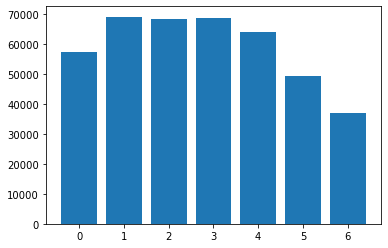

In [272]:
# sum()をそのまま使うと全体の合計が算出されるが、引数levelでインデックス列の名前を指定すると、そのインデックスごとの合計（この場合は各曜日の合計）が算出される。
# print(aa.sum())

# display(aa.sum(level='weekday'))
# display(aa.groupby(level='weekday').agg(['sum', 'mean','median']))
aam = aa.groupby(level='weekday').agg(['sum', 'mean','median'])
plt.bar(aam.index,aam[('reserve_visitors','sum')])
plt.bar(aam.index,aam[('reserve_visitors','mean')])
aam

In [255]:
mm = a.set_index([a.index.month, a.index])
# aa[50:90]
# このままだとインデックス列の名前が重複しているので、index.names属性を書き換える。
mm.index.names = ['month', 'date']
mm.sort_index(inplace=True)
# mm[50:90]

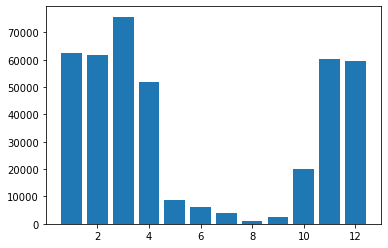

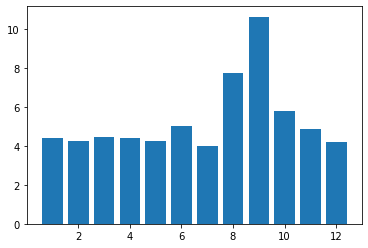

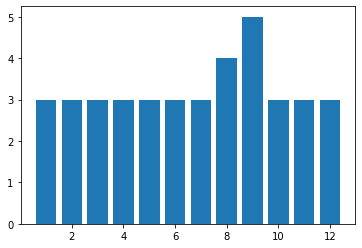

reserve_visitors                  
                   sum       mean median
month                                   
1              62393.0   4.387076    3.0
2              61788.0   4.260066    3.0
3              75774.0   4.428379    3.0
4              51990.0   4.383273    3.0
5               8582.0   4.233843    3.0
6               6010.0   5.016694    3.0
7               3779.0   3.977895    3.0
8               1077.0   7.748201    4.0
9               2412.0  10.625551    5.0
10             20122.0   5.780523    3.0
11             60408.0   4.878301    3.0
12             59680.0   4.180736    3.0

In [263]:
mmm = mm.groupby(level='month').agg(['sum', 'mean','median'])
plt.bar(mmm.index,mmm[('reserve_visitors','sum')])
plt.show()
plt.bar(mmm.index,mmm[('reserve_visitors','mean')])
plt.show()
plt.bar(mmm.index,mmm[('reserve_visitors','median')])
plt.show()
mmm